In [3]:
# Coursera DeepLearningAI Course - Introduction to TensroFlow for AI, ML and DL
# Week 2 - Computer Vision Neural Network (MNIST dataset)

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# MNIST fashion data set

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Dataset can be also downloaded here: https://github.com/zalandoresearch/fashion-mnist

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# https://www.youtube.com/watch?v=fXOsFF95ifk

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

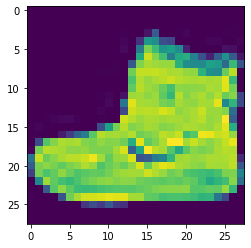

In [6]:
np.set_printoptions(linewidth=200)
plt.imshow(train_images[0])
print(train_labels[0])
print(train_images[0])

In [7]:
# Normalize data to get pixel values between 0 and 1

train_images_norm = train_images / 255.0
test_images_norm = test_images / 255.0

In [10]:
# Create a model 

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
                                    tf.keras.layers.Dense(125, activation=tf.nn.relu), # Layer in the shape of the data
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

# Sequential = define a sequence of layers in the NN
# Dense = adds a layer of neurons
# Relu -> if X > 0 return X, else return 0 -> passes values to the next layer
# Softmax -> picks the biggest value of the last layer

In [17]:
# Train the model

model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_norm, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2315 - accuracy: 0.9130
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2271 - accuracy: 0.9147
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2161 - accuracy: 0.9186
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2125 - accuracy: 0.9205
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2049 - accuracy: 0.9223
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1966 - accuracy: 0.9274
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1901 - accuracy: 0.9291
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1833 - accuracy: 0.9301
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1835 - accuracy: 0.9305
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.184

In [13]:
# loss of 0.24 / accuracy of 91% -> 5 epochs
# loss of 0.18 / accuracy of 93% -> 10 epochs

In [18]:
model.evaluate(test_images_norm, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3856 - accuracy: 0.8809


[0.38558128476142883, 0.8809000253677368]

In [19]:
# 5 epochs: [0.3356669843196869, 0.8826000094413757]
# 10 epochs: [0.38558128476142883, 0.8809000253677368]

In [23]:
# Get probabilities

classifications = model.predict(test_images_norm)

# Classification of the 1st element
print(classifications[0])
print(test_labels[0])

[3.8770514e-14 4.4422855e-12 3.9844551e-12 2.0224775e-15 1.6046582e-18 1.3338131e-05 3.1968782e-11 2.4394369e-05 2.3641980e-13 9.9996221e-01]
9


In [22]:
# The list represents the probability that a given item is of certain class  
# -> the highest probablity is for the last class(9), so the image will be classified as an ankle boot (label 9) 

In [24]:
# Rules: 
# 1) The first layer should be the same shape as the data
# 2) The number of neurons in the last layer should match the number of classes 

# Huge number of epochs (iterations) can lead to overfitting -> see below

In [25]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_norm, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1761 - accuracy: 0.9342
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1654 - accuracy: 0.9388
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1640 - accuracy: 0.9375
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1638 - accuracy: 0.9377
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1581 - accuracy: 0.9418
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1559 - accuracy: 0.9412
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1506 - accuracy: 0.9435
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1443 - accuracy: 0.9454
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1464 - accuracy: 0.9458
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.137

In [26]:
# Get probabilities (30 epochs)

classifications = model.predict(test_images_norm)

# Classification of the 1st element
print(classifications[0])
print(test_labels[0])

[4.6505547e-23 7.6778193e-18 2.7823652e-19 3.3126021e-23 9.7385230e-35 2.2673809e-12 5.9499515e-20 5.0333158e-05 7.5705732e-22 9.9994969e-01]
9


In [28]:
# Callbacks
# tf.keras.callbacks.Callback()

class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):  # on_epoch_end: at the end of the epoch (only for training!)
    if(logs.get("loss")<0.4):
      print("\n Reached accuracy of 60%. Training cancelled")
      self.model.stop_training = True

callback = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
                                    tf.keras.layers.Dense(125, activation=tf.nn.relu), # Layer in the shape of the data
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_norm, train_labels, epochs=10, callbacks=[callback])


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6383 - accuracy: 0.7797
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3821 - accuracy: 0.8630

 Reached accuracy of 60%. Training cancelled


In [32]:
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):  # on_epoch_end: at the end of the epoch (only for training!)
    if(logs.get("accuracy")>0.9):
      print("\n Reached accuracy of 90%. Training cancelled")
      self.model.stop_training = True

callback = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), # Input layer: Flatten = converting into 1-dimensional set
                                    tf.keras.layers.Dense(125, activation=tf.nn.relu), # Layer in the shape of the data
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Output layer -> 10 because of 10 labels

model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images_norm, train_labels, epochs=10, callbacks=[callback])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6355 - accuracy: 0.7794
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3873 - accuracy: 0.8615
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.8801
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3147 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2980 - accuracy: 0.8886
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2828 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2686 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2595 - accuracy: 0.9040

 Reached accuracy of 90%. Training cancelled


In [33]:
# Exercise - Handwriting recognition

mnist = tf.keras.datasets.mnist
(train_images_hw, train_labels_hw), (test_images_hw, test_labels_hw) = mnist.load_data()
train_images_hw_norm = train_images_hw / 255.0
test_images_hw_norm = test_images_hw / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [34]:
print(train_images_hw[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

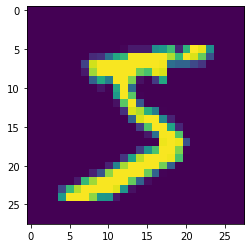

In [35]:
np.set_printoptions(linewidth=200)
plt.imshow(train_images_hw[0])

In [39]:
model_hw = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                       tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model_hw.compile(optimizer = "adam",
                 loss = "sparse_categorical_crossentropy",
                 metrics="accuracy")

class myCallback_hw (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):  # on_epoch_end: at the end of the epoch (only for training!)
    if(logs.get("accuracy")>0.99):
      print("\n Reached accuracy of 99%. Training cancelled")
      self.model.stop_training = True

callback_hw = myCallback_hw()

model.fit(test_images_hw_norm, test_labels_hw, epochs = 10, callbacks = [callback_hw])

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.5717 - accuracy: 0.8383
Epoch 2/10
313/313 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.9416
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.9588
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1103 - accuracy: 0.9691
Epoch 5/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9770
Epoch 6/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9823
Epoch 7/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0530 - accuracy: 0.9877
Epoch 8/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0430 - accuracy: 0.9913

 Reached accuracy of 99%. Training cancelled
